In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

palette = sns.color_palette("Spectral")


import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(10).style.set_properties(**{'background-color': '#F6FBFC','color': '#000','border': '1px solid #000000'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Feature Enginnering

So, after reading the Red Wine Quality dataset description we got that;

***quality > 6.5 is "good"
quality < 6.5 is "bad"***

good --> 1
bad ---> 0

In [6]:
df['quality-in-binary'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

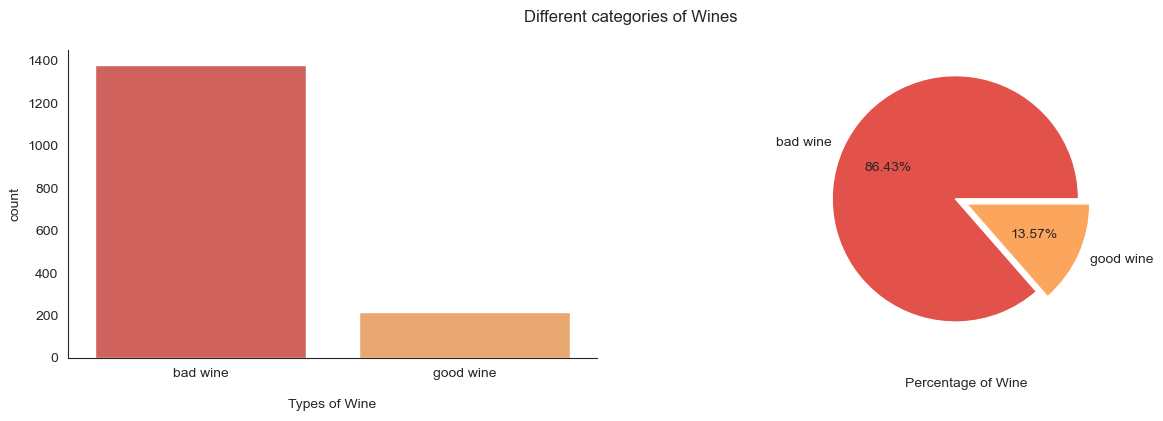

In [7]:
sns.set_style("white")
plt.figure(figsize=(15, 4))

wineScale_insight = df['quality-in-binary']

plt.subplot(1, 2, 1)
sns.countplot(df, x=wineScale_insight, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")


plt.subplot(1, 2, 2)
plt.pie(wineScale_insight.value_counts().values, labels=['bad wine', 'good wine'], autopct="%.2f%%", explode=[0.1, 0], colors=palette)
plt.xlabel("\nPercentage of Wine")

plt.suptitle('Different categories of Wines')
sns.despine()

# Sampling the Data

So from the above visualization we can see that the Dataset is ***skewed or unbalanced***, now what we can do is to Over Sample the minority class using ***Synthetic Minority Oversampling Technique (SMOTE)***

In [8]:
X = df.drop(['quality','quality-in-binary'], axis=1)
y = df.quality

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

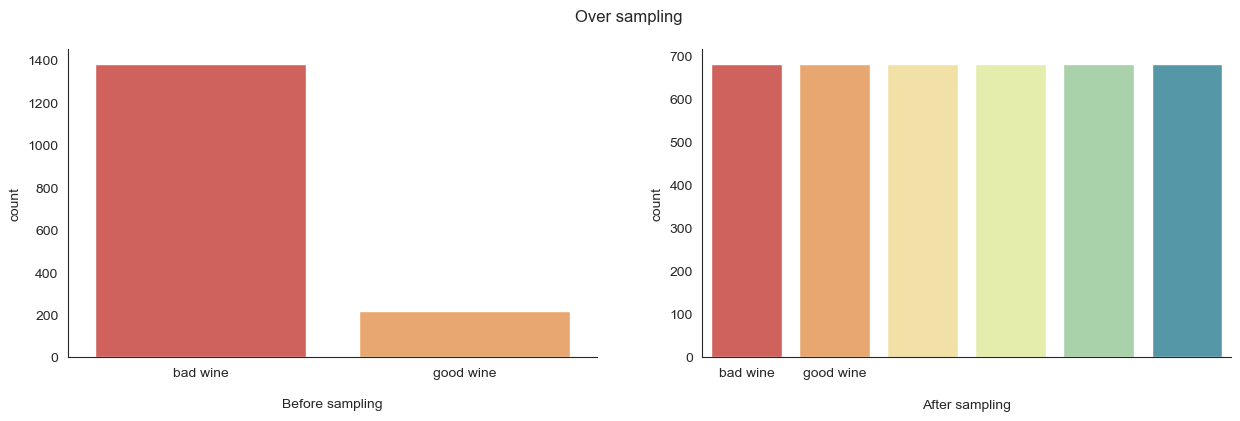

In [10]:
sns.set_style("white")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='quality-in-binary', palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nBefore sampling")

plt.subplot(1, 2, 2)
sns.countplot(x=y_smote, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nAfter sampling")

plt.suptitle('Over sampling \n\n\n')

sns.despine()

# Data Visualizations

In [11]:
def viz_insights(field):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=field, hue="quality-in-binary", kde=True, palette=palette, bins=20, multiple="stack", alpha=.3)
    plt.legend(['bad wine', 'good wine'])
    if field == "density": plt.title(f"\n{field.capitalize()} of red wine\n\n")
    else: plt.title(f"\n{field} contents in red wine\n\n")
    plt.figtext(0.75, 0.3, f'{df[field].describe()}')
    sns.despine()

# Visualize the fixed acidity contents in red wine

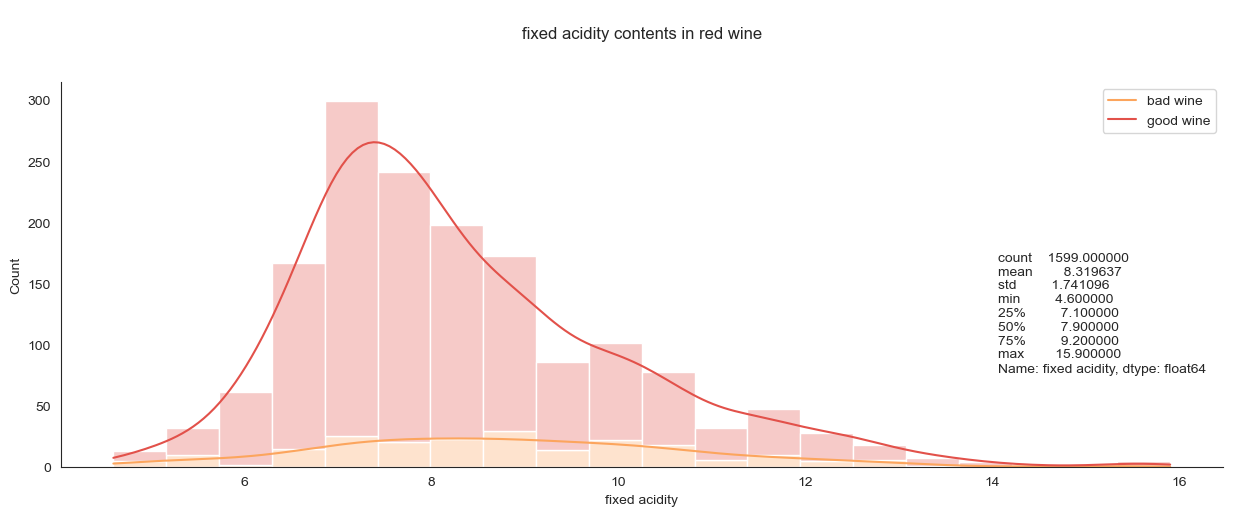

In [12]:
viz_insights("fixed acidity")

# Visualize the volatile acidity contents in red wine

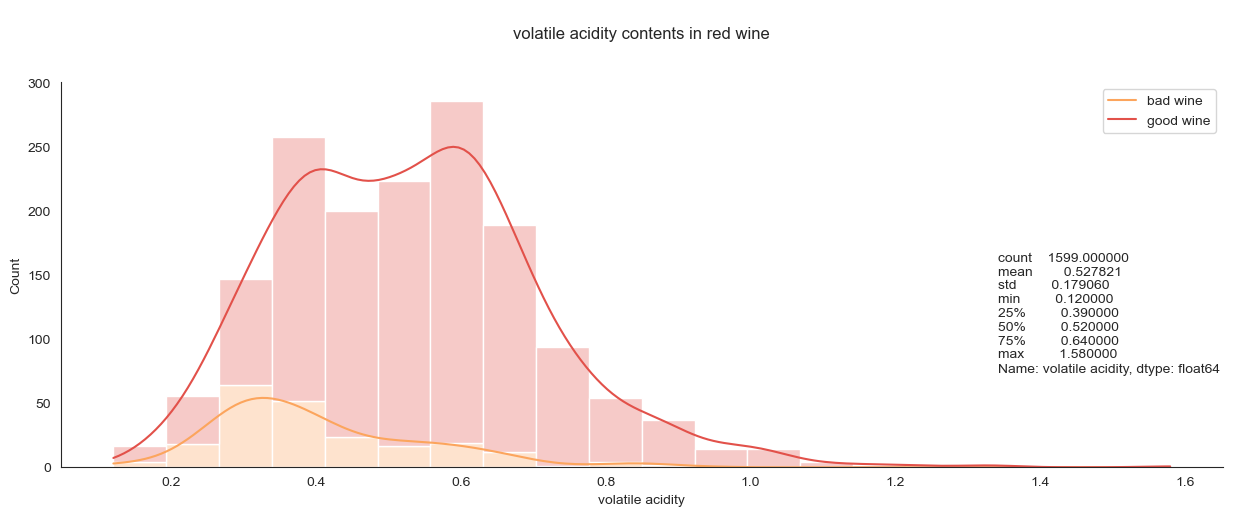

In [13]:
viz_insights("volatile acidity")

# Visualize the citric acid contents in red wine

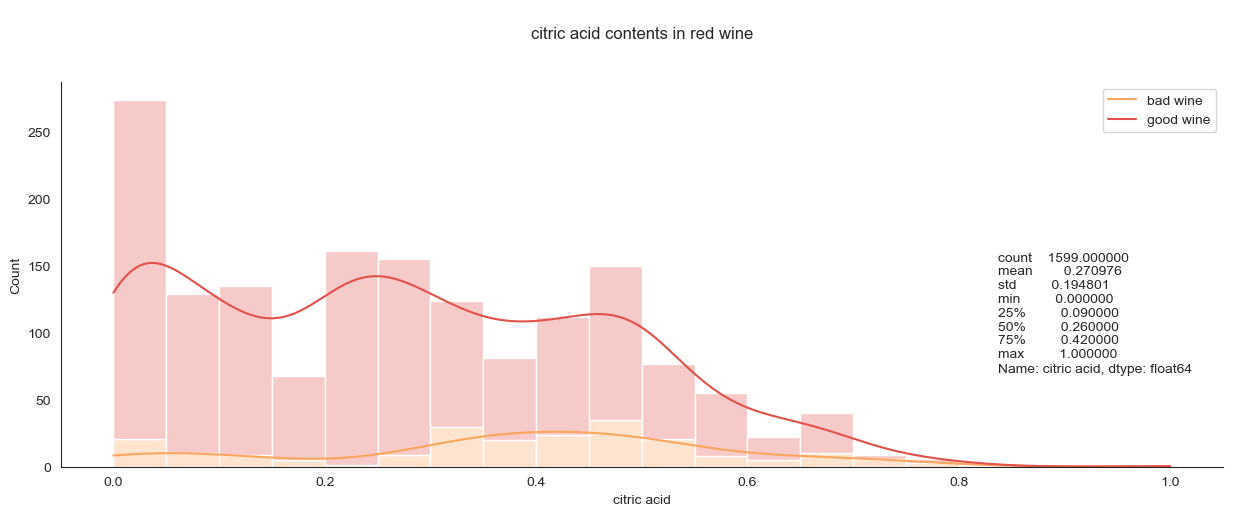

In [14]:
viz_insights("citric acid")

# Visualize the residual sugar contents in red wine

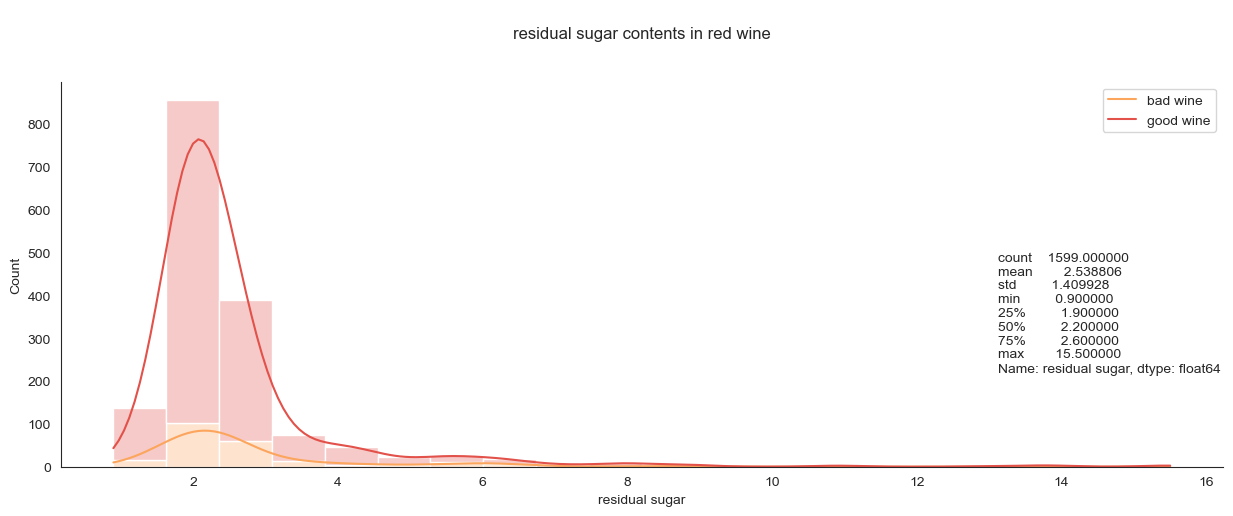

In [15]:
viz_insights("residual sugar")

# Visualize the chlorides contents in red wine 

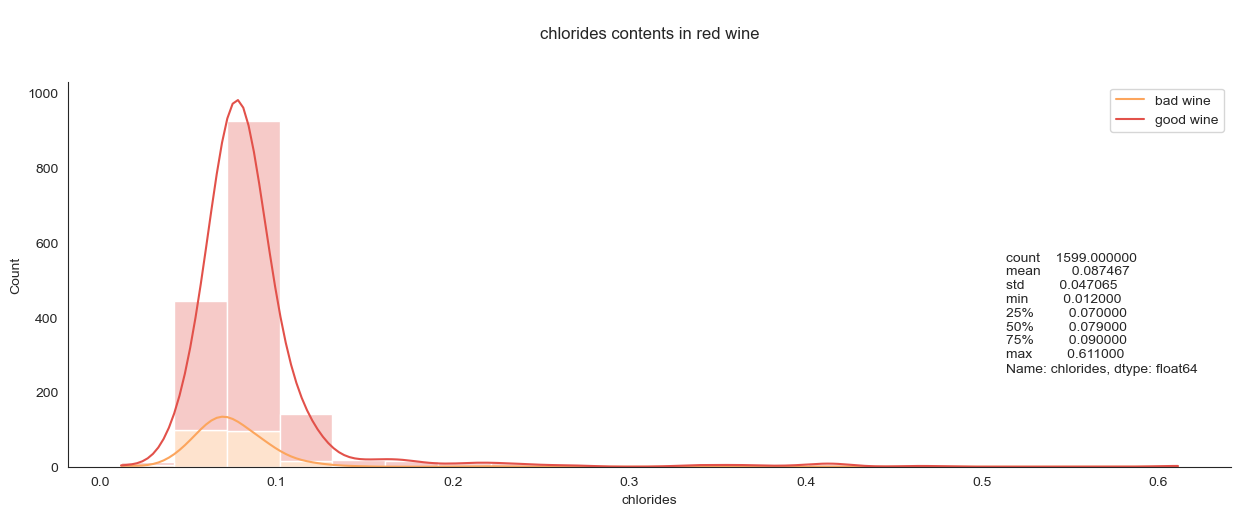

In [16]:
viz_insights("chlorides")

# Visualize the free sulfur dioxide contents in red wine 

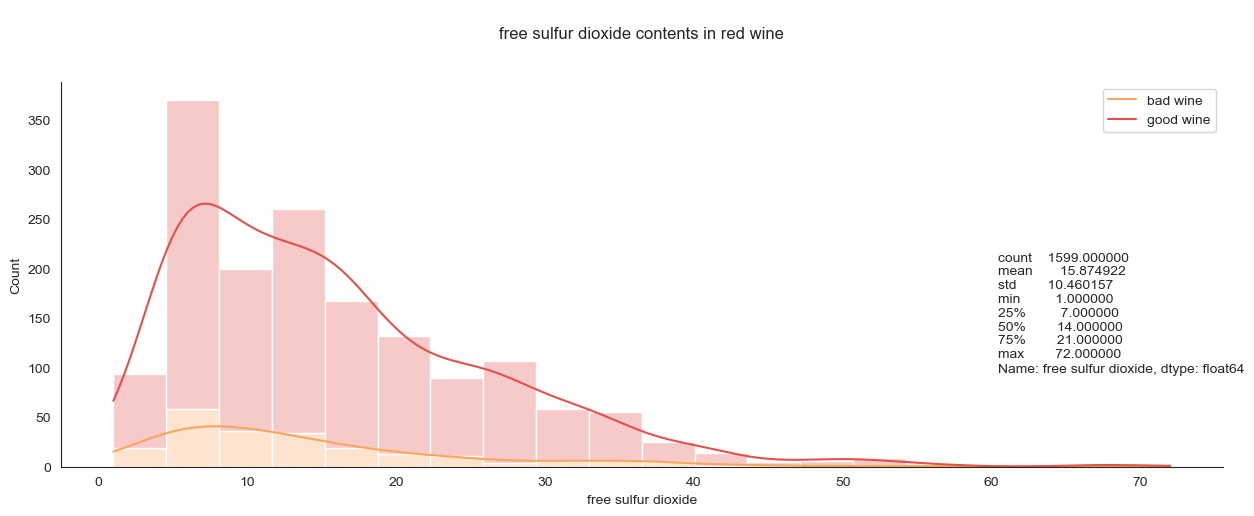

In [17]:
viz_insights("free sulfur dioxide")

# Visualize the total sulfur dioxide contents in red wine 

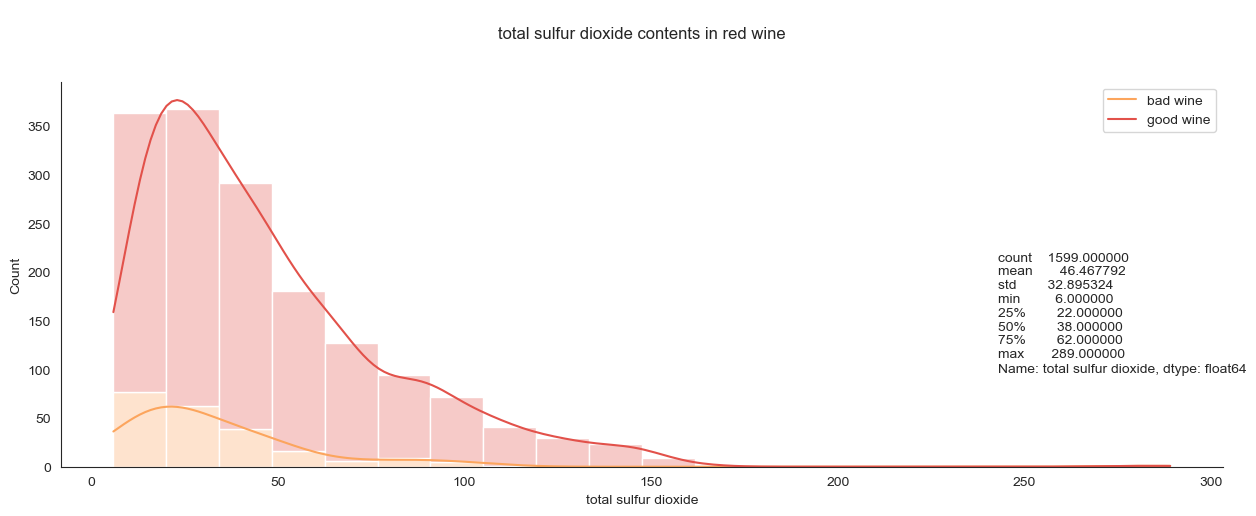

In [18]:
viz_insights("total sulfur dioxide")

# Visualize the density contents in red wine 

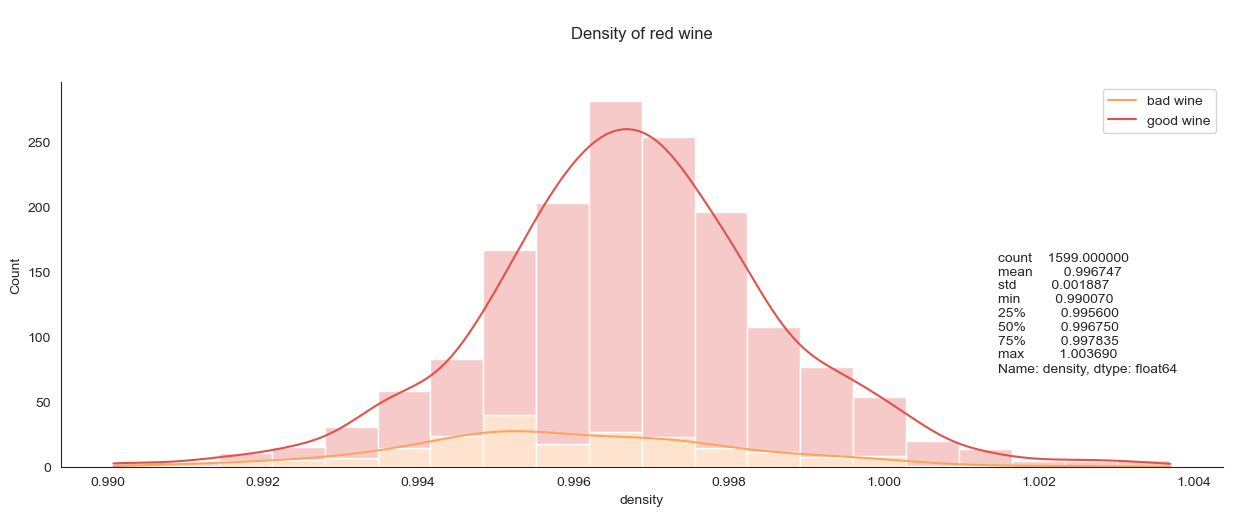

In [19]:
viz_insights("density")

# Visualize the pH contents in red wine

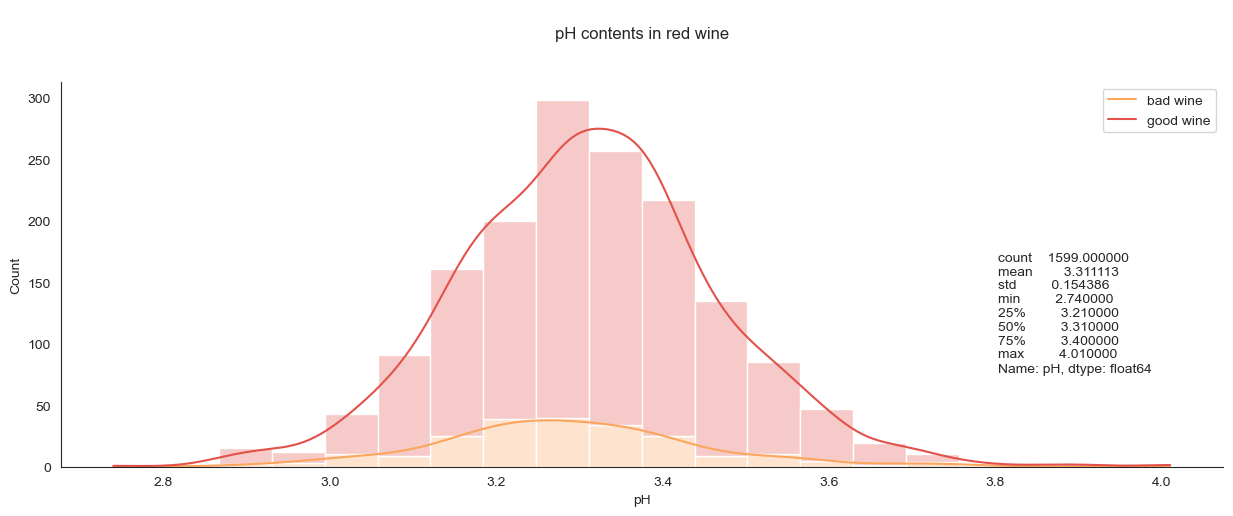

In [20]:
viz_insights("pH")

# Visualize the sulphates contents in red wine 

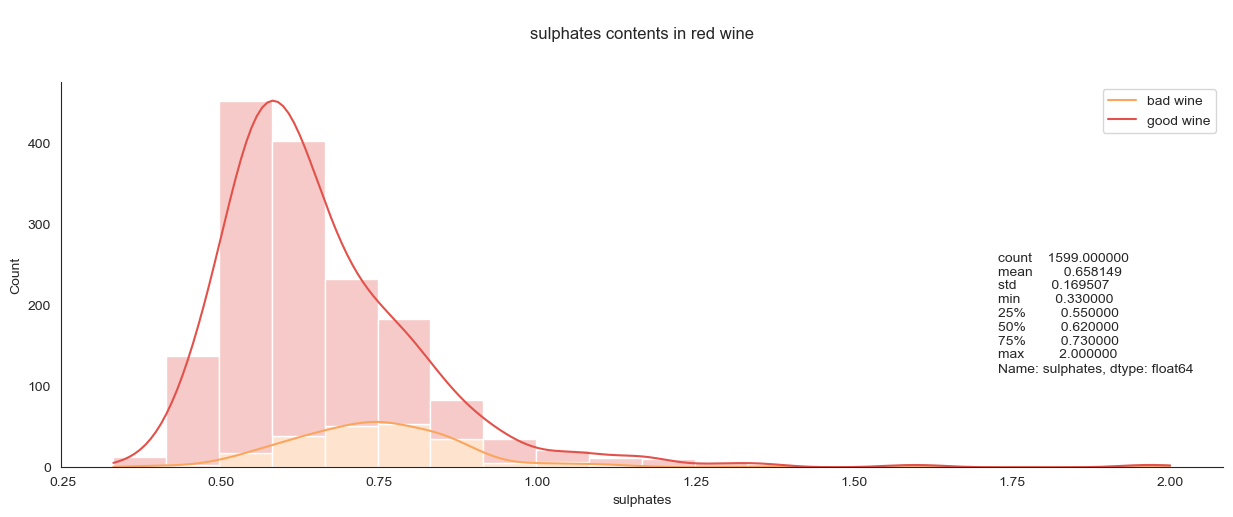

In [21]:
viz_insights("sulphates")

# Visualize the alcohol contents in red wine 

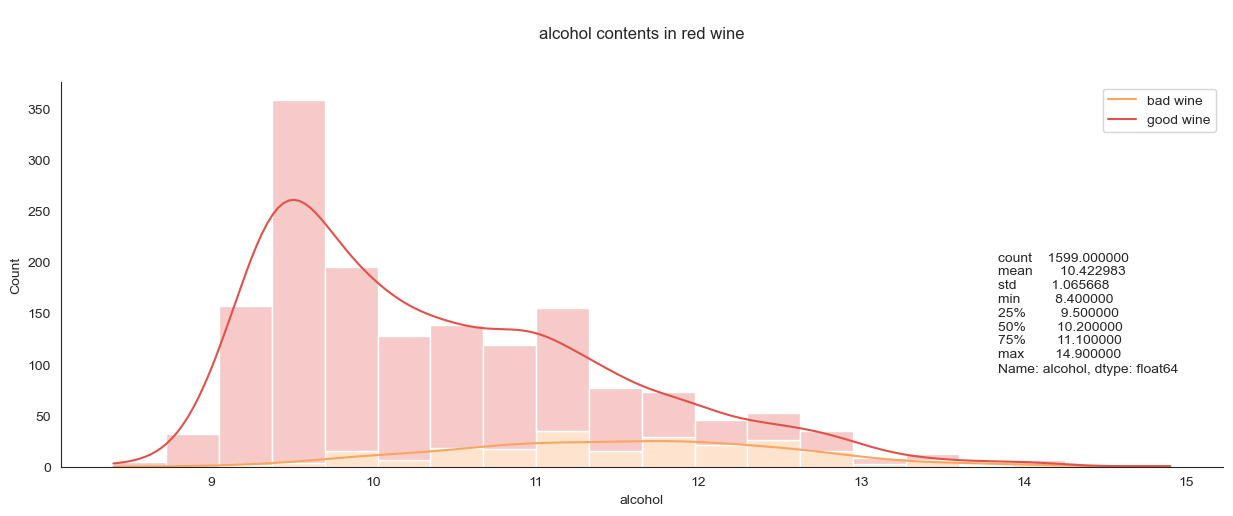

In [22]:
viz_insights("alcohol")

# Visualize the Correlation contents in red wine

In [23]:
df.corr().style.background_gradient(cmap=plt.cm.Spectral)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-in-binary
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


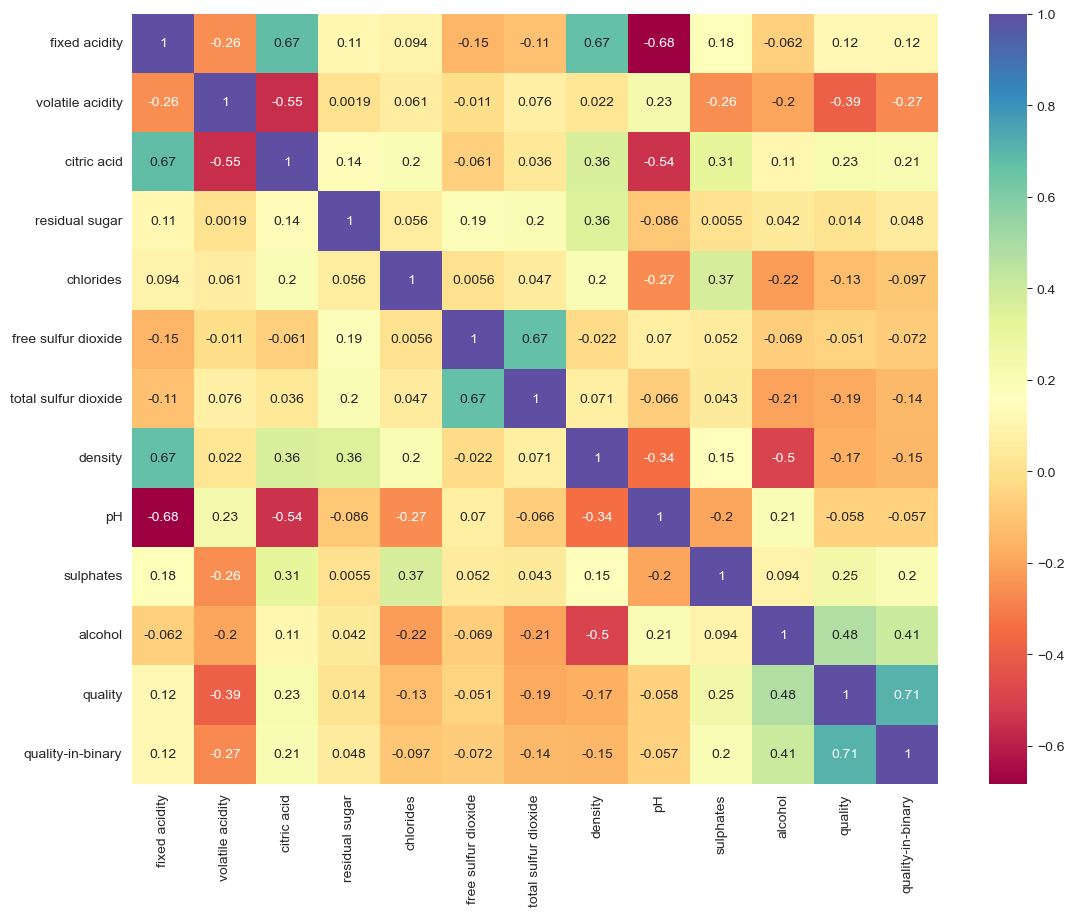

In [24]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

# Visualize the Relationships between variables contents in red wine

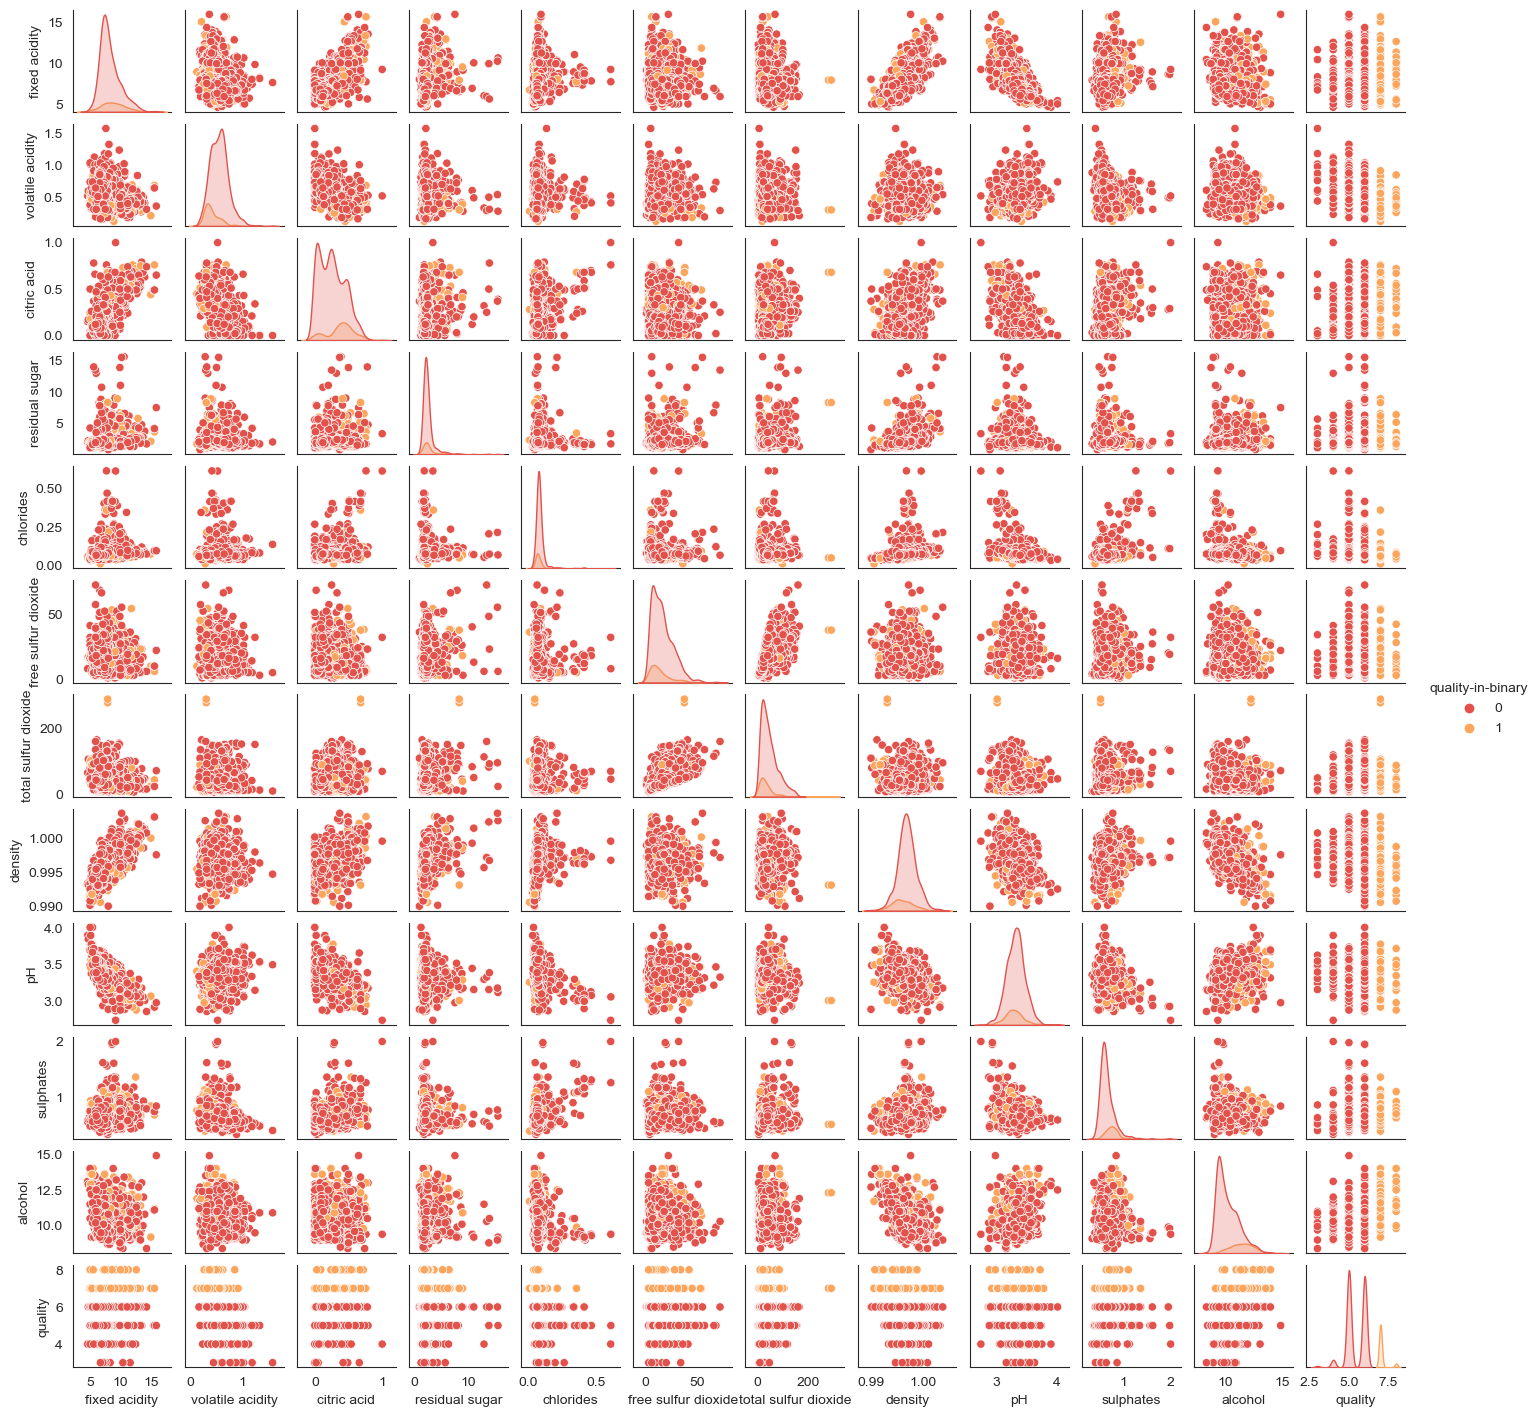

In [25]:
sns.pairplot(df, hue='quality-in-binary', palette=palette, size=1.2, diag_kind = 'kde')
plt.show()

# Preprocessing

# Feature Scaling 

Lets scale the variables in range

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_smote)

# Train, test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Model

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
test_predictions=np.round(model.predict(X_test))

# Performance evaluation

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean absolute error

In [33]:
mean_absolute_error(y_test,test_predictions)

0.649706457925636

# Mean squared error

In [34]:
mean_squared_error(y_test,test_predictions)

0.8140900195694716

# Final model

In [35]:
final_model=LinearRegression()

In [36]:
final_model.fit(X,y)

LinearRegression()

# Coefficients

In [37]:
final_model.coef_

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

# Saving the Model

In [38]:
from joblib import dump,load

In [39]:
dump(final_model,'red-wine-quality-prediction-model.joblib')

['red-wine-quality-prediction-model.joblib']

# Logistic regression

# Sampling the Data

In [40]:
X = df.drop(['quality','quality-in-binary'], axis=1)
y = df['quality-in-binary']

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Preprocessing

# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_smote)

# Train, test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred=log_model.predict(X_test)

# Performance evaluation

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Accuracy

In [51]:
accuracy_score(y_test,y_pred)

0.8060781476121563

# Confusion matrix

In [52]:
cm=confusion_matrix(y_test,y_pred)

In [53]:
cm

array([[287,  75],
       [ 59, 270]], dtype=int64)

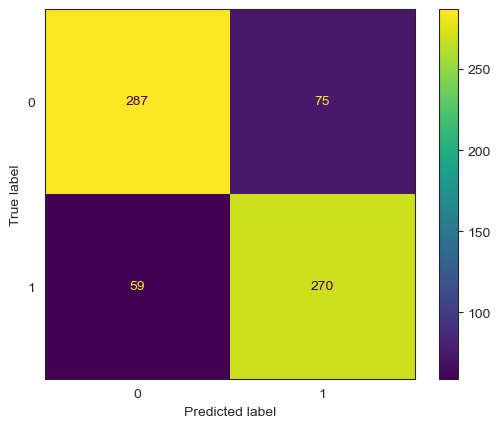

In [61]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot();

# Classification report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       362
           1       0.78      0.82      0.80       329

    accuracy                           0.81       691
   macro avg       0.81      0.81      0.81       691
weighted avg       0.81      0.81      0.81       691



# Final model

In [56]:
final_log_model=LogisticRegression()

In [57]:
final_log_model.fit(X,y)

LogisticRegression()

# Coefficients

In [58]:
final_log_model.coef_

array([[-0.02198483, -2.96563405,  0.26501482,  0.09976929, -2.06217921,
         0.0125773 , -0.01572727, -1.48639163, -1.87562981,  1.87934858,
         0.92606783]])

# Saving the Model

In [59]:
dump(final_log_model,'red-wine-quality-prediction-using-LogisticRegression-model.joblib')

['red-wine-quality-prediction-using-LogisticRegression-model.joblib']